# LB4

In [169]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax

## Часть 1 Загрузка данных

2. Загрузить данные в датафрейм

In [170]:
all_data = pd.read_csv("data/groceries - groceries.csv")
all_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Переформировать данные, удалив все значения NaN

In [171]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

4. Получить список всех уникальных товаров

In [172]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

5. Вывести список товаров и их количество

In [173]:
print(unique_items)
print(len(unique_items))

{'canned beer', 'soft cheese', 'hard cheese', 'sound storage medium', 'cling film/bags', 'soap', 'salad dressing', 'dish cleaner', 'kitchen utensil', 'flour', 'processed cheese', 'cereals', 'sausage', 'female sanitary products', 'specialty bar', 'frozen fish', 'potato products', 'mustard', 'shopping bags', 'sauces', 'organic sausage', 'margarine', 'instant coffee', 'whipped/sour cream', 'spread cheese', 'hygiene articles', 'liquor', 'beef', 'frozen meals', 'bottled beer', 'cookware', 'baby food', 'potted plants', 'canned vegetables', 'jam', 'cream', 'dog food', 'butter', 'prosecco', 'rubbing alcohol', 'specialty chocolate', 'honey', 'sliced cheese', 'abrasive cleaner', 'domestic eggs', 'meat spreads', 'pasta', 'red/blush wine', 'sparkling wine', 'yogurt', 'napkins', 'misc. beverages', 'canned fruit', 'tea', 'tropical fruit', 'waffles', 'cream cheese', 'photo/film', 'white wine', 'whisky', 'other vegetables', 'beverages', 'newspapers', 'pickled vegetables', 'make up remover', 'turkey', 

## Часть 2 FPGrowth и FPMax

1. Преобразуем данные к виду, удобному для анализа

In [174]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


2. Проведем ассоциативный анализ, используя FPGrowth с поддержкой 0.03

In [175]:
result = fpgrowth(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.058566,(margarine),1
2,0.139502,(yogurt),1
3,0.104931,(tropical fruit),1
4,0.058058,(coffee),1
...,...,...,...
58,0.033249,"(whole milk, pastry)",2
59,0.047382,"(root vegetables, other vegetables)",2
60,0.048907,"(root vegetables, whole milk)",2
61,0.030605,"(sausage, rolls/buns)",2


3. Определите минимальное и максимальное значение для уровня поддержки для набора из
1, 2 и тд объектов

In [176]:
for l in range(1, result['length'].max() +  1):
    print(f"leng {l}: ",'[', result[result['length'] == l]['support'].min(), ';',
      result[result['length'] == l]['support'].max(), ']')

leng 1:  [ 0.03040162684290798 ; 0.25551601423487547 ]
leng 2:  [ 0.030096593797661414 ; 0.07483477376715811 ]


4. Проведем анализ, используя FPMax

In [177]:
result = fpmax(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.030402,(specialty chocolate),1
1,0.031012,(onions),1
2,0.032944,(hygiene articles),1
3,0.033249,(berries),1
4,0.033249,(hamburger meat),1
5,0.033452,(UHT-milk),1
6,0.033859,(sugar),1
7,0.037112,(dessert),1
8,0.037417,(long life bakery product),1
9,0.037824,(salty snack),1


In [178]:
for l in range(1, result['length'].max() +  1):
    print('[', result[result['length'] == l]['support'].min(), ';',
      result[result['length'] == l]['support'].max(), ']')

[ 0.03040162684290798 ; 0.09852567361464158 ]
[ 0.030096593797661414 ; 0.07483477376715811 ]


5. Сравнить результаты работы алгоритмов

FPMax в результате работы возвращает максимальные множества. Под максимальными подразумеваются
такие, которые явлюятся частыми и не существует таких множеств, в которые они входит и они также
являются частыми.

6. Получим гистограмму для каждого товара (самые часто встречающиеся)

<AxesSubplot:>

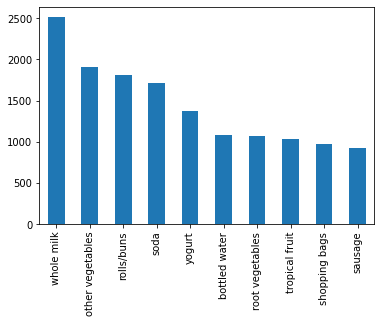

In [179]:
data.sum().nlargest(10).plot.bar()

7. Преобразуем набор данных, чтобы он содержал ограниченный набор товаров

In [180]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage',
         'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
         'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]

8. Проведем анализ обоих алгоритмов на этом наборе

In [181]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [182]:
result = fpgrowth(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.139502,(yogurt),1
2,0.104931,(tropical fruit),1
3,0.255516,(whole milk),1
4,0.193493,(other vegetables),1
5,0.183935,(rolls/buns),1
6,0.080529,(bottled beer),1
7,0.110524,(bottled water),1
8,0.174377,(soda),1
9,0.088968,(pastry),1


In [183]:
result = fpmax(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.057651,(pork),1
1,0.032232,"(whipped/sour cream, whole milk)",2
2,0.077682,(canned beer),1
3,0.080529,(bottled beer),1
4,0.030503,"(citrus fruit, whole milk)",2
5,0.033249,"(whole milk, pastry)",2
6,0.030605,"(sausage, rolls/buns)",2
7,0.098526,(shopping bags),1
8,0.035892,"(tropical fruit, other vegetables)",2
9,0.042298,"(whole milk, tropical fruit)",2


9. Построим графики изменения количества получаемых правил от уровня поддержки

In [184]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

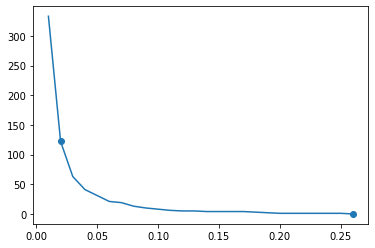

In [185]:
import numpy as np
import matplotlib.pyplot as plt

support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpgrowth(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

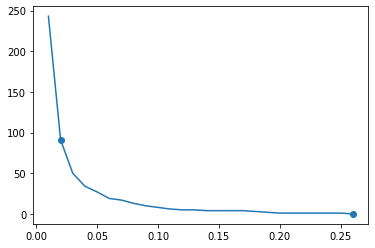

In [186]:
support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpmax(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

## Часть 3 Ассоциативные правила

1. Сформируем набор данных из определенных товаров так, чтобы размер транзакций
был 2 и более

In [187]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

2. Получим частоты наборов, используя алгоритм FPGrowth

In [188]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)
result

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


3. Проведем ассоциативный анализ

In [189]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
6,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


Что означает каждая колонка?
- antecedents - первый член отношения
- consequents - второй член отношения
- antecedent support - поддержка первого члена отношения
- consequent support - поддержка второго члена отношения
- support - поддержка отношения
- confidence - отношение поддержки отношения и поддержки первого члена
- lift - отношение поддержки отношения и поддержки второго члена
- leverage - разность поддержки отношения и поддержки членов, если бы они существовали раздельно
- conviction - отношение обратной поддержки второго члена и обратной поддержки отношения

4. На основании какой метрики проводился расчет?
confidence

5. Провести анализ для различных метрик

In [190]:
rules = association_rules(result, metric='lift', min_threshold = 1.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
3,(other vegetables),(tropical fruit),0.335079,0.185864,0.071083,0.212139,1.141370,0.008804,1.033351
4,(soda),(bottled water),0.267217,0.185461,0.057390,0.214770,1.158033,0.007832,1.037325
5,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153
6,(citrus fruit),(other vegetables),0.146395,0.335079,0.057189,0.390646,1.165836,0.008135,1.091192
7,(other vegetables),(citrus fruit),0.335079,0.146395,0.057189,0.170673,1.165836,0.008135,1.029274
8,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
9,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276


In [191]:
rules = association_rules(result, metric='support', min_threshold = 0.08)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
3,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
4,(whole milk),(tropical fruit),0.421869,0.185864,0.083770,0.198568,1.068352,0.005359,1.015852
5,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
6,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
7,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
8,(rolls/buns),(other vegetables),0.296214,0.335079,0.084374,0.284840,0.850070,-0.014881,0.929752
9,(other vegetables),(rolls/buns),0.335079,0.296214,0.084374,0.251803,0.850070,-0.014881,0.940642


In [192]:
rules = association_rules(result, metric='confidence', min_threshold = 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
6,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


Смысл метрик:
- support - самое частое правило
- lift - насколько часто можно встретить это правило во всех наборах, где есть второй
член правила
- confidence - насколько часто можно встретить это правило во всех наборах, где есть первый
член правила

7. Построим граф для следующего анализа

In [193]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')

rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,yogurt,whole milk,0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,tropical fruit,whole milk,0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
2,other vegetables,whole milk,0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
3,citrus fruit,whole milk,0.146395,0.421869,0.060411,0.412655,0.978159,-0.001349,0.984313
4,root vegetables,other vegetables,0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,root vegetables,whole milk,0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,whipped/sour cream,whole milk,0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
7,whipped/sour cream,other vegetables,0.124245,0.335079,0.057189,0.460292,1.373683,0.015557,1.232002
8,pastry,whole milk,0.150624,0.421869,0.065848,0.437166,1.036260,0.002304,1.027179


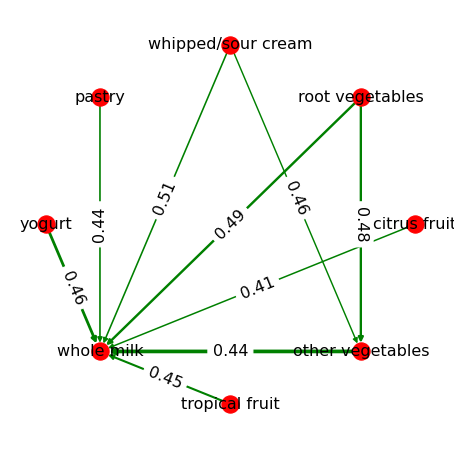

In [194]:
import networkx as nx
from matplotlib.pyplot import figure

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['confidence', 'support'], create_using=nx.DiGraph())

labels = {}
for u, v, data in G.edges(data=True):
    labels[(u, v)] = round(data['confidence'], 2)

figure(figsize=(8, 8))
pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=16, font_color='black')
nx.draw_networkx_labels(G, pos, font_size=16, font_color='black')
nx.draw(G, pos, arrows=True, width=rules['support'] * 25, node_color='red', edge_color='green')

8. Какую информацию из него можно извлечь?
На данном графике, к примеру, видно, какие объекты входят в наибольшее количество правил, какое
правило является самым сильным